# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [306]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [307]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [308]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [309]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:








**No hace falta escribir código para responder estas preguntas.**

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

1. El conjunto de datos consiste en información sobre casas ubicadas en Boston con una serie de atributos o características para cada una y su precio.
2. La variable que vamos a predecir es la que se encuentra en el dataset como `target`. Ésta hace referencia al precio de la casa en cuestión.
3. 
- **CRIM**: Crimen per capita por ciudad.
- **ZN**: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
- **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
- **CHAS**: Indica si limita con el río (1) o no (0).
- **NOX**: Concentración de óxidos nítricos (partes por 10 millones).
- **RM**: Número promedio de habitaciones por vivienda.
- **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.
- **RAD**: Índice de accesibilidad a carreteras radiales.
- **TAX**: Tasa de impuesto a la propiedad de valor total por \$ 10,000.
- **PTRATIO**: Relación alumno-profesor por localidad.
- **B**: 1000 `(Bk - 0.63) ^ 2` donde Bk es la proporción de personas afroamericanas por ciudad.
- **LSTAT**: Porcentaje de estado bajo de la población (1/2 de la proporción de adultos sin educación secundaria y la proporción de trabajadores masculinos clasificados como 'trabajadores')
- **MEDV**: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares.
4. Los atributos que a simple vista parecen ser más importantes para la predicción son CRIM y RM.
5. Se puede observar que utilizan el atributo B que indica la proporción de personas afroamericanas por ciudad; también el atributo LSTAT. Estos atributos no serían éticamente correctos.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

### 1. Gráficos pairplots de cada feature respecto al valor mediano de la vivienda

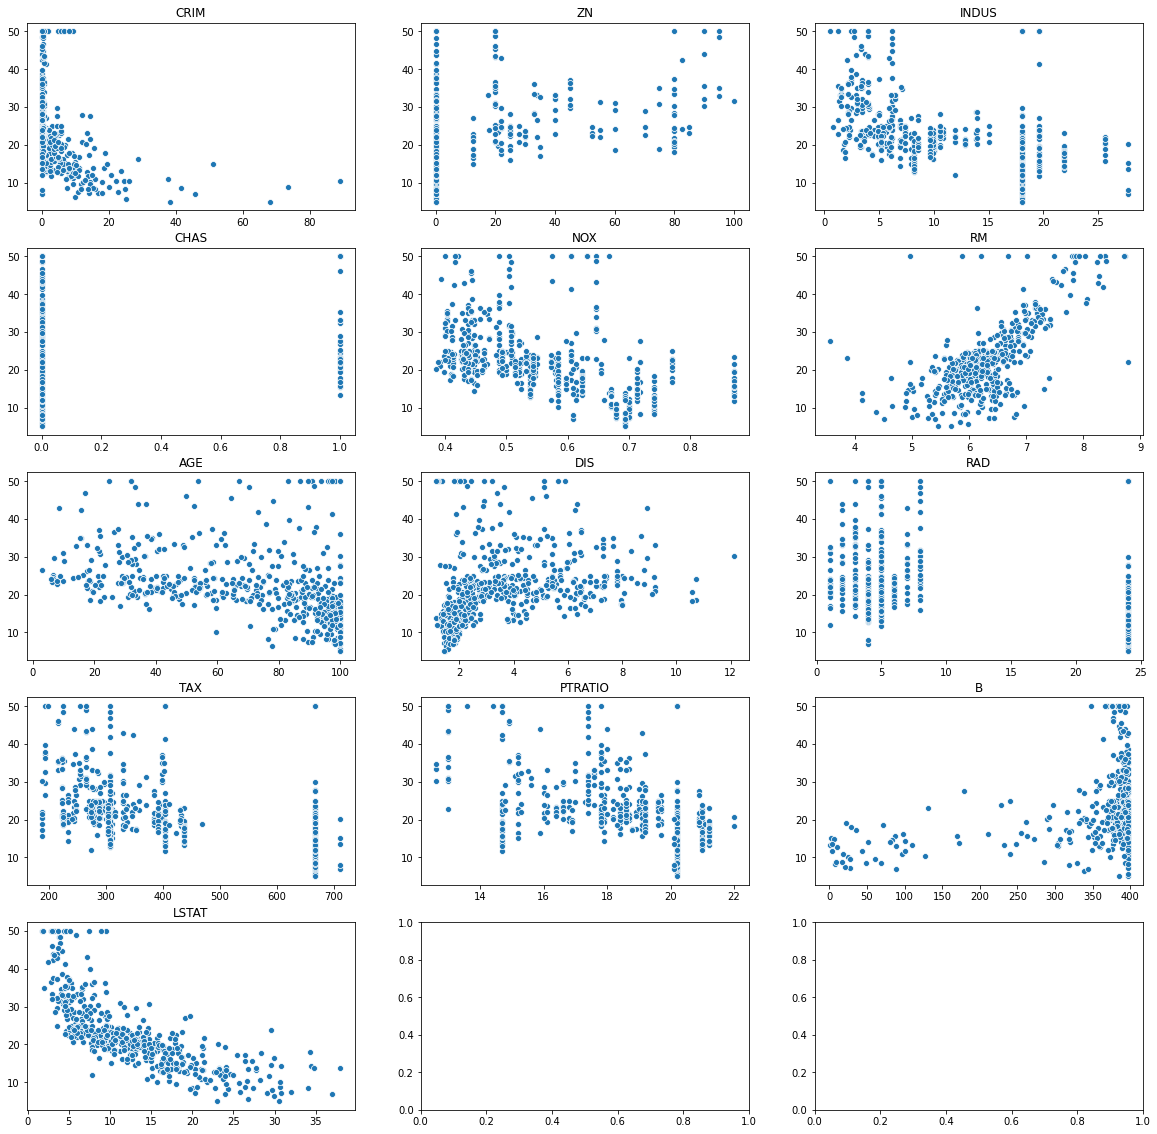

In [310]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
row = 0
col = 0
for f in boston['feature_names']:
        selector = (boston['feature_names'] == f)
        sns.scatterplot(X[:, selector].flatten(), y, ax=axs[row, col])
        axs[row, col].set_title(f)
        col = col + 1 if col < 2 else 0
        row = row + 1 if col == 0 else row
plt.show()

### 2. Variables más correlacionadas a simple vista
Las variables que, a simple vista, más correlacionan con la variable objetivo son:
- RM (cantidad promedio de habitaciones): correlación positiva
- LSTAT (% of lower status of population): correlación negativa

### 3. Variables más importantes, según nuestros supuestos
- RM
- AGE
- CRIM
- LSTAT

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### 1. Selección de atributo

In [311]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

### 2. Instanciación y entrenamiento

In [312]:
model_lr = LinearRegression()  # Instanciación
model_lr.fit(X_train_f, y_train);  # Entrenamiento

### 3. Predicción y evaluación

In [313]:
y_train_pred_lr = model_lr.predict(X_train_f)
y_test_pred_lr = model_lr.predict(X_test_f)

In [314]:
train_error_lr = mean_squared_error(y_train, y_train_pred_lr)
test_error_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f'Train MSE: {train_error_lr:.2f}')
print(f'Test MSE: {test_error_lr:.2f}')
print(f'Train R2: {train_r2_lr:.4f}')
print(f'Test R2: {test_r2_lr:.4f}')

Train MSE: 42.82
Test MSE: 46.91
Train R2: 0.4971
Test R2: 0.4239


### 4. Gráfico del modelo

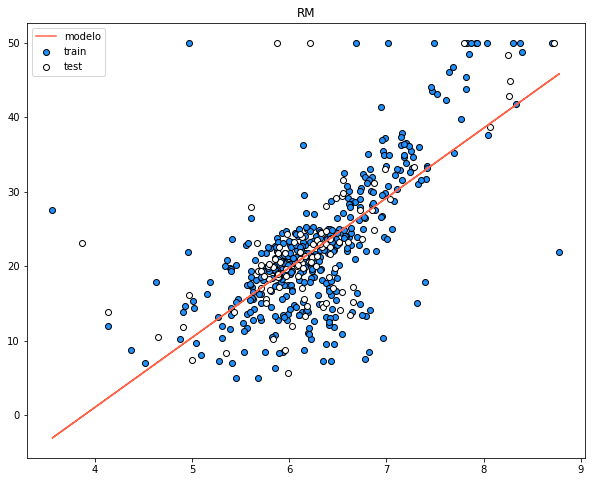

In [315]:
plt.figure(figsize=(10,8))
plt.plot(X[:, selector], model_lr.predict(X[:, selector]), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

### 5. Análisis del resultado del modelo

El modelo obtenido es demasiado simple y, por lo tanto, comete errores en la predicciones. En los puntos siguientes se le agregará mayor complejidad para minimizar dicho error.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### 1. Instanciación y entrenamiento

In [316]:
train_errors_plr_d = []
test_errors_plr_d = []
degrees = [i for i in range(10)]
for degree in degrees:
    # Entrenamiento
    model_plr_d = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_plr_d.fit(X_train_f, y_train)
    
    # Predicción
    y_train_pred_plr_d = model_plr_d.predict(X_train_f)
    y_test_pred_plr_d = model_plr_d.predict(X_test_f)
    
    # Evaluación
    train_error_plr_d = mean_squared_error(y_train, y_train_pred_plr_d)
    test_error_plr_d = mean_squared_error(y_test, y_test_pred_plr_d)
    train_errors_plr_d.append(train_error_plr_d)
    test_errors_plr_d.append(test_error_plr_d)

### 2. Gráfico de curvas de error

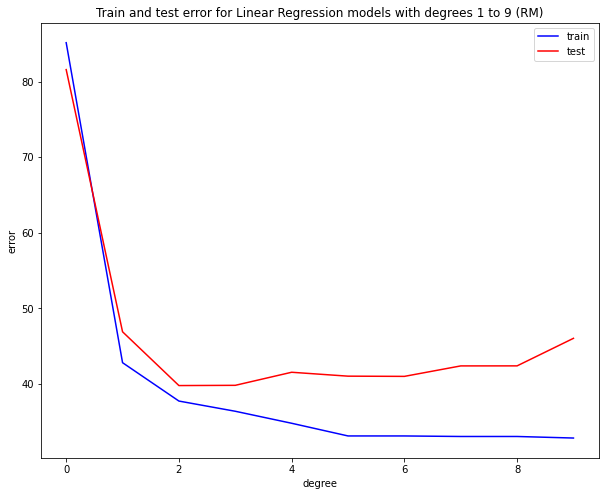

In [317]:
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors_plr_d, color="blue", label="train")
plt.plot(degrees, test_errors_plr_d, color="red", label="test")
plt.legend()
plt.title("Train and test error for Linear Regression models with degrees 1 to 9 (RM)")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### 3. Grado del polinomio a partir del cual hay overfitting

A partir del grado 3 del polinomio comienza a haber overfitting porque se ve que, si bien el error en entrenamiento baja, el error en test comienza a subir.

### 4. Mejor modelo

In [318]:
# Instanciación
degree = 2
model_plr = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenamiento
model_plr.fit(X_train_f, y_train);

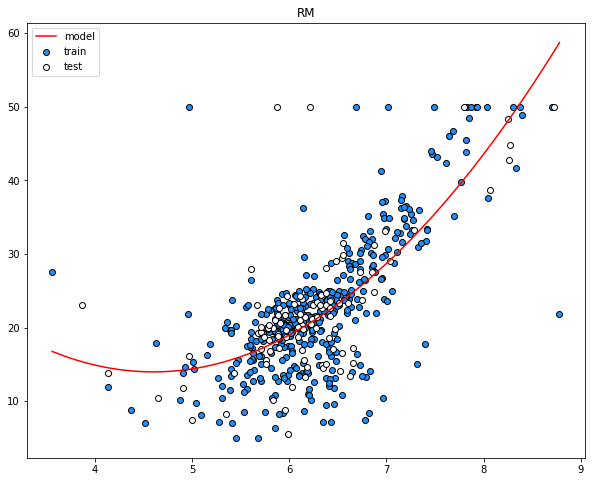

In [319]:
# Gráfico
x_range_start = min(
    np.min(X_train_f),
    np.min(X_test_f))
x_range_end = max(
    np.max(X_train_f),
    np.max(X_test_f))
x_model = np.linspace(x_range_start, x_range_end, 300)

plt.figure(figsize=(10,8))
plt.plot(x_model, model_plr.predict(x_model.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [320]:
# Predicciones
y_train_pred_plr = model_plr.predict(X_train_f)
y_test_pred_plr = model_plr.predict(X_test_f)

# Evaluación
train_error_plr = mean_squared_error(y_train, y_train_pred_plr)
test_error_plr = mean_squared_error(y_test, y_test_pred_plr)
train_r2_plr = r2_score(y_train, y_train_pred_plr)
test_r2_plr = r2_score(y_test, y_test_pred_plr)

print(f'Train MSE: {train_error_plr:.2f}')
print(f'Test MSE: {test_error_plr:.2f}')
print(f'Train R2: {train_r2_plr:.4f}')
print(f'Test R2: {test_r2_plr:.4f}')

Train MSE: 37.75
Test MSE: 39.79
Train R2: 0.5567
Test R2: 0.5113


### 5. Interpretación del resultado

El modelo entrenado con un polinomio de grado 2 obtiene mejor performance que el modelo lineal (sobre los datos de entrenamiento como en los de test) ya que permite un mejor ajuste a algunos puntos de los extremos

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### 1. Selección de atributos relevantes

In [321]:
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

### 2. Entrenamiento y evaluación de la regresión

In [322]:
# Determinación de grado óptimo de polinomio
train_errors_plrm_d = []
test_errors_plrm_d = []
degrees = [i for i in range(1, 10)]
for degree in degrees:
    # Entrenamiento
    model_plrm_d = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_plrm_d.fit(X_train_fs, y_train)
    
    # Predicción
    y_train_pred_plrm_d = model_plrm_d.predict(X_train_fs)
    y_test_pred_plrm_d = model_plrm_d.predict(X_test_fs)
    
    # Evaluación
    train_error_plrm_d = mean_squared_error(y_train, y_train_pred_plrm_d)
    test_error_plrm_d = mean_squared_error(y_test, y_test_pred_plrm_d)
    train_errors_plrm_d.append(train_error_plrm_d)
    test_errors_plrm_d.append(test_error_plrm_d)

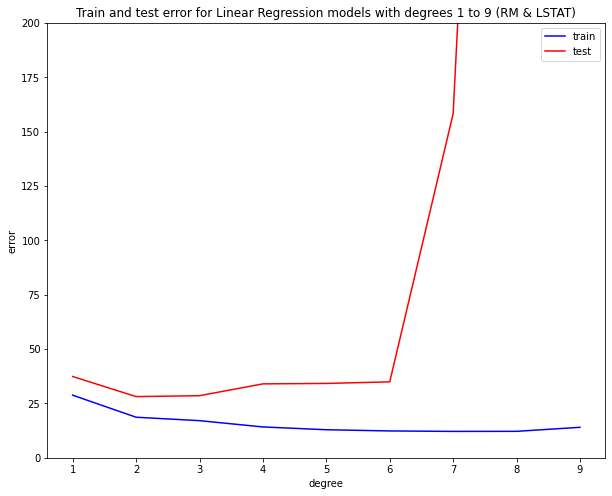

In [323]:
# Gráfico de curvas de error
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors_plrm_d, color="blue", label="train")
plt.plot(degrees, test_errors_plrm_d, color="red", label="test")
plt.legend()
plt.title("Train and test error for Linear Regression models with degrees 1 to 9 (RM & LSTAT)")
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim([0,200])
plt.show()

Para no complejizar el modelo, basta con un polinomio de grado 2 para obtener buenos resultados tanto en test como en train

In [324]:
degree = 2
model_plrm = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # Instanciación
model_plrm.fit(X_train_fs, y_train);  # Entrenamiento

In [325]:
y_train_pred_plrm = model_plrm.predict(X_train_fs)
y_test_pred_plrm = model_plrm.predict(X_test_fs)

In [326]:
train_error_plrm = mean_squared_error(y_train, y_train_pred_plrm)
test_error_plrm = mean_squared_error(y_test, y_test_pred_plrm)
train_r2_plrm = r2_score(y_train, y_train_pred_plrm)
test_r2_plrm = r2_score(y_test, y_test_pred_plrm)
print(f'Train MSE: {train_error_plrm:.2f}')
print(f'Test MSE: {test_error_plrm:.2f}')
print(f'Train R2: {train_r2_plrm:.4f}')
print(f'Test R2: {test_r2_plrm:.4f}')

Train MSE: 18.66
Test MSE: 28.14
Train R2: 0.7808
Test R2: 0.6544


### 3. Interpretación del resultado

Al incluir una segunda variable, se observa que la performance del modelo, tanto en el conjunto de entrenamiento como en el de test, mejora significativamente respecto al modelo polinomial de una variable.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [327]:
# Determinación de grado óptimo de polinomio
train_errors_plrm_full_d = []
test_errors_plrm_full_d = []
degrees = [i for i in range(1, 10)]
for degree in degrees:
    # Entrenamiento
    model_plrm_full_d = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_plrm_full_d.fit(X_train, y_train)
    
    # Predicción
    y_train_pred_plrm_full_d = model_plrm_full_d.predict(X_train)
    y_test_pred_plrm_full_d = model_plrm_full_d.predict(X_test)
    
    # Evaluación
    train_error_plrm_full_d = mean_squared_error(y_train, y_train_pred_plrm_full_d)
    test_error_plrm_full_d = mean_squared_error(y_test, y_test_pred_plrm_full_d)
    train_errors_plrm_full_d.append(train_error_plrm_full_d)
    test_errors_plrm_full_d.append(test_error_plrm_full_d)

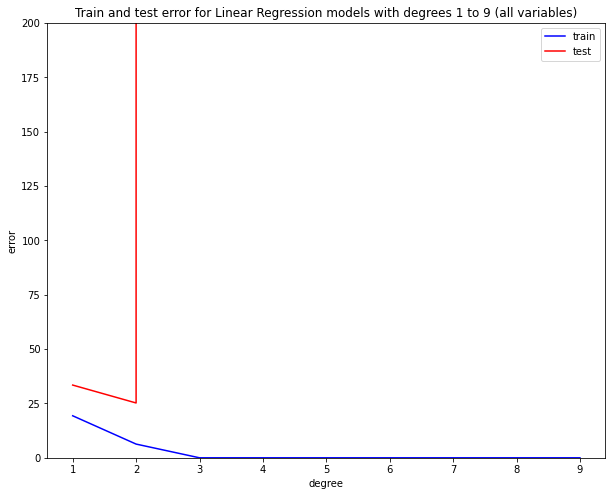

In [328]:
# Gráfico de curvas de error
plt.figure(figsize=(10,8))
plt.plot(degrees, train_errors_plrm_full_d, color="blue", label="train")
plt.plot(degrees, test_errors_plrm_full_d, color="red", label="test")
plt.legend()
plt.title("Train and test error for Linear Regression models with degrees 1 to 9 (all variables)")
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim([0,200])
plt.show()

Un polinomio de grado 2 minimizaría los errores en entrenamiento como en test.

In [329]:
degree = 2
model_plrm_full = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # Instanciación
model_plrm_full.fit(X_train, y_train);  # Entrenamiento

In [330]:
y_train_pred_plrm_full = model_plrm_full.predict(X_train)
y_test_pred_plrm_full = model_plrm_full.predict(X_test)

In [331]:
train_error_plrm_full = mean_squared_error(y_train, y_train_pred_plrm_full)
test_error_plrm_full = mean_squared_error(y_test, y_test_pred_plrm_full)
train_r2_plrm_full = r2_score(y_train, y_train_pred_plrm_full)
test_r2_plrm_full = r2_score(y_test, y_test_pred_plrm_full)
print(f'Train MSE: {train_error_plrm_full:.2f}')
print(f'Test MSE: {test_error_plrm_full:.2f}')
print(f'Train R2: {train_r2_plrm_full:.4f}')
print(f'Test R2: {test_r2_plrm_full:.4f}')

Train MSE: 6.31
Test MSE: 25.22
Train R2: 0.9259
Test R2: 0.6903


Como se ve, la performance del modelo mejora sustancialmente sobre el conjunto de entrenamiento. Sin embargo, el modelo no tiene mejoras significativas sobre el conjunto de test, por lo que está generalizando de forma "pobre", por así decirlo (estamos en presencia de overfitting).

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [332]:
# Determinación de grado óptimo de polinomio
train_errors_prm_d = []
test_errors_prm_d = []
degree = 3
alphas = np.linspace(start=1e-5, stop=1.0)
for alpha in alphas:
    # Entrenamiento
    model_prm_d = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model_prm_d.fit(X_train_fs, y_train)
    
    # Predicción
    y_train_pred_prm_d = model_prm_d.predict(X_train_fs)
    y_test_pred_prm_d = model_prm_d.predict(X_test_fs)
    
    # Evaluación
    train_error_prm_d = mean_squared_error(y_train, y_train_pred_prm_d)
    test_error_prm_d = mean_squared_error(y_test, y_test_pred_prm_d)
    train_errors_prm_d.append(train_error_prm_d)
    test_errors_prm_d.append(test_error_prm_d)

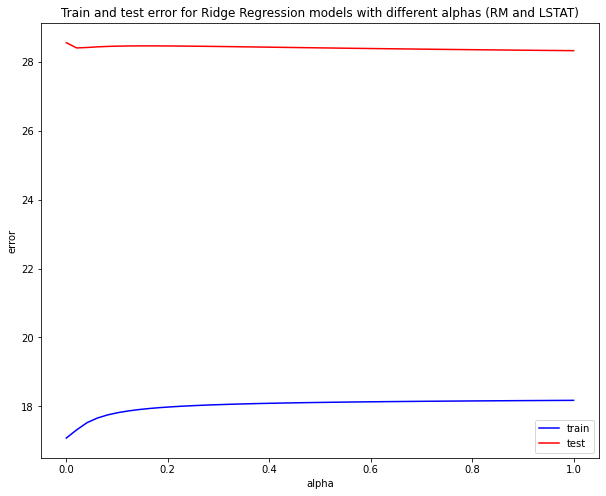

In [333]:
# Gráfico de curvas de error
plt.figure(figsize=(10,8))
plt.plot(alphas, train_errors_prm_d, color="blue", label="train")
plt.plot(alphas, test_errors_prm_d, color="red", label="test")
plt.legend()
plt.title("Train and test error for Ridge Regression models with different alphas (RM and LSTAT)")
plt.xlabel("alpha")
plt.ylabel("error")
plt.show()

In [334]:
degree = 3
alpha = 1e-01
model_prm = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))  # Instanciación
model_prm.fit(X_train_fs, y_train);  # Entrenamiento

In [335]:
y_train_pred_prm = model_prm.predict(X_train_fs)
y_test_pred_prm = model_prm.predict(X_test_fs)

In [336]:
train_error_prm = mean_squared_error(y_train, y_train_pred_prm)
test_error_prm = mean_squared_error(y_test, y_test_pred_prm)
train_r2_prm = r2_score(y_train, y_train_pred_prm)
test_r2_prm = r2_score(y_test, y_test_pred_prm)
print(f'Train MSE: {train_error_prm:.2f}')
print(f'Test MSE: {test_error_prm:.2f}')
print(f'Train R2: {train_r2_prm:.4f}')
print(f'Test R2: {test_r2_prm:.4f}')

Train MSE: 17.81
Test MSE: 28.47
Train R2: 0.7908
Test R2: 0.6504


Como se observa, la performance del modelo con 2 variables no mejora significativamente aplicando la regularización Ridge.

## Resumen de todos los modelos implementados

In [337]:
models_train_mse = [train_error_lr, train_error_plr, train_error_plrm, train_error_plrm_full, train_error_prm]
models_test_mse = [test_error_lr, test_error_plr, test_error_plrm, test_error_plrm_full, test_error_prm]
models_train_r2 = [train_r2_lr, train_r2_plr, train_r2_plrm, train_r2_plrm_full, train_r2_prm]
models_test_r2 = [test_r2_lr, test_r2_plr, test_r2_plrm, test_r2_plrm_full, test_r2_prm]

df_models_mse = pd.DataFrame(
    data=[models_train_mse, models_test_mse, models_train_r2, models_test_r2],
    columns=['LR 1V D1', 'LR 1V D2', 'LR 2V D2', 'LR 13V D2', 'RR 2V D3'],
    index=['Train MSE', 'Test MSE', 'Train R2', 'Test R2']
)

print('Resumen de modelos:\n')
df_models_mse.round(2).transpose()

Resumen de modelos:



,Train MSE,Test MSE,Train R2,Test R2
LR 1V D1,42.82,46.91,0.50,0.42
LR 1V D2,37.75,39.79,0.56,0.51
LR 2V D2,18.66,28.14,0.78,0.65
LR 13V D2,6.31,25.22,0.93,0.69
RR 2V D3,17.81,28.47,0.79,0.65
